In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os

print(os.listdir("/kaggle/input"))

['audio-cats-and-dogs']


In [2]:
print(os.listdir("/kaggle/input/audio-cats-and-dogs"))

['cats_dogs', 'utils.py', 'train_test_split.csv']


In [3]:
print(os.listdir("/kaggle/input/audio-cats-and-dogs/cats_dogs"))

['dog_barking_102.wav', 'cat_43.wav', 'dog_barking_29.wav', 'cat_47.wav', 'dog_barking_50.wav', 'dog_barking_83.wav', 'cat_83.wav', 'cat_84.wav', 'cat_129.wav', 'cat_74.wav', 'cat_124.wav', 'dog_barking_30.wav', 'cat_89.wav', 'cat_52.wav', 'dog_barking_98.wav', 'cat_21.wav', 'cat_103.wav', 'cat_153.wav', 'cat_165.wav', 'cat_70.wav', 'dog_barking_33.wav', 'dog_barking_32.wav', 'cat_100.wav', 'dog_barking_2.wav', 'dog_barking_17.wav', 'cat_13.wav', 'cat_63.wav', 'cat_11.wav', 'cat_109.wav', 'dog_barking_6.wav', 'dog_barking_88.wav', 'cat_130.wav', 'cat_136.wav', 'cat_150.wav', 'dog_barking_101.wav', 'cat_139.wav', 'dog_barking_15.wav', 'cat_69.wav', 'dog_barking_94.wav', 'cat_72.wav', 'cat_156.wav', 'dog_barking_13.wav', 'cat_28.wav', 'cat_120.wav', 'dog_barking_60.wav', 'cat_19.wav', 'cat_128.wav', 'dog_barking_85.wav', 'dog_barking_27.wav', 'cat_141.wav', 'cat_67.wav', 'cat_68.wav', 'cat_93.wav', 'dog_barking_42.wav', 'cat_86.wav', 'cat_142.wav', 'cat_10.wav', 'dog_barking_9.wav', 'dog

In [4]:
base_path = "/kaggle/input/audio-cats-and-dogs/cats_dogs"

In [5]:
import os

files = os.listdir(base_path)

cat_files = [f for f in files if f.startswith("cat_")]
dog_files = [f for f in files if f.startswith("dog_barking")]

print("Number of cat files:", len(cat_files))
print("Number of dog files:", len(dog_files))

Number of cat files: 164
Number of dog files: 113


In [6]:
import librosa

cat_file = cat_files[0]
audio_path = os.path.join(base_path, cat_file)

y, sr = librosa.load(audio_path, sr=16000)

print("Sampling rate:", sr)
print("Duration (seconds):", len(y)/sr)

Sampling rate: 16000
Duration (seconds): 12.0


In [7]:
from IPython.display import Audio
Audio(y, rate=sr)

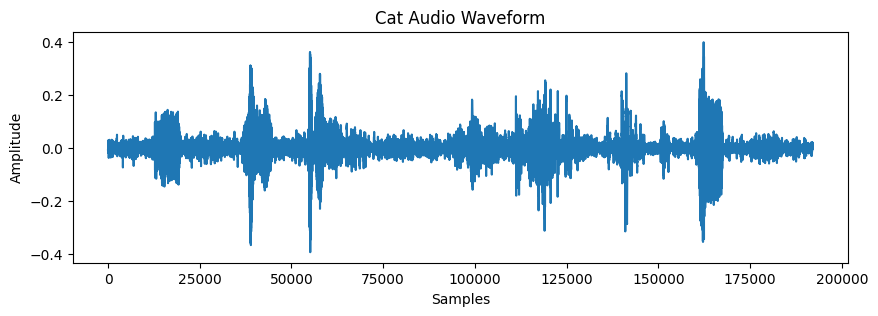

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(y)
plt.title("Cat Audio Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [9]:
TARGET_DURATION = 2.0   # seconds
TARGET_SAMPLES = int(sr * TARGET_DURATION)

print("Target samples:", TARGET_SAMPLES)

Target samples: 32000


In [11]:
import numpy as np

def crop_or_pad(y, target_length):
    if len(y) > target_length:
        # Crop (trim)
        y = y[:target_length]
    else:
        # Pad with zeros (silence)
        y = np.pad(y, (0, target_length - len(y)))
    return y

In [12]:
print("Original length:", len(y))

y_fixed = crop_or_pad(y, TARGET_SAMPLES)

print("Fixed length:", len(y_fixed))

Original length: 192000
Fixed length: 32000


In [13]:
from IPython.display import Audio

print("Original audio")
Audio(y, rate=sr)

print("Fixed-length audio")
Audio(y_fixed, rate=sr)

Original audio
Fixed-length audio


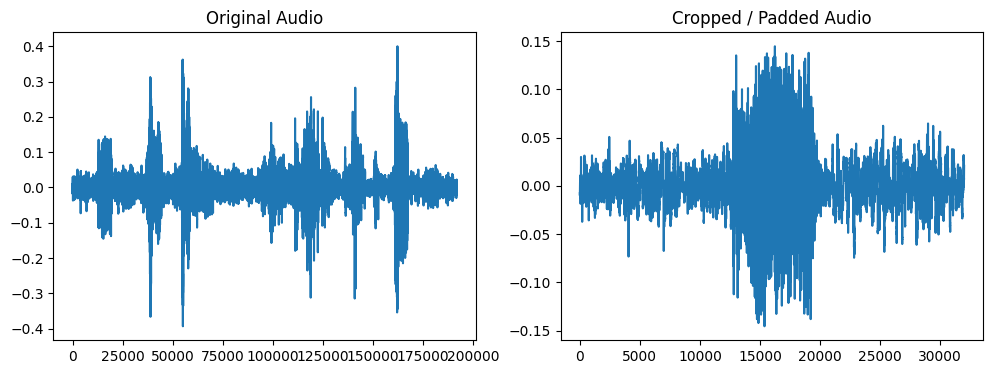

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(y)
plt.title("Original Audio")

plt.subplot(1,2,2)
plt.plot(y_fixed)
plt.title("Cropped / Padded Audio")

plt.show()

In [16]:
import librosa
import numpy as np

In [17]:
n_mfcc = 13  # standard choice

mfcc = librosa.feature.mfcc(
    y=y_fixed,
    sr=sr,
    n_mfcc=n_mfcc
)

print("MFCC shape:", mfcc.shape)

MFCC shape: (13, 63)


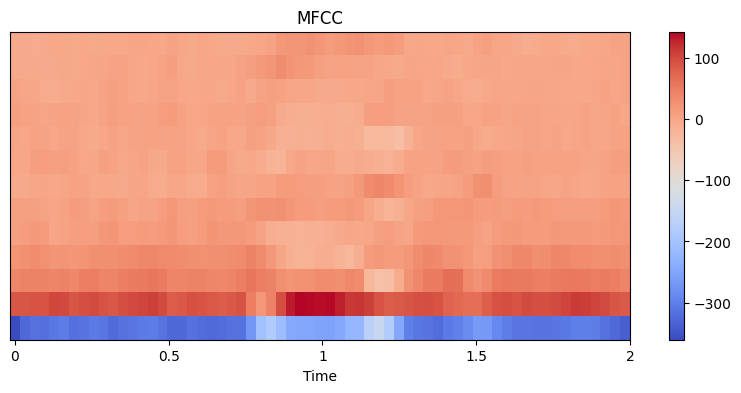

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.show()

In [19]:
mfcc_mean = np.mean(mfcc, axis=1)
mfcc_std = np.std(mfcc, axis=1)

features = np.hstack((mfcc_mean, mfcc_std))

print("Feature vector length:", len(features))

Feature vector length: 26


In [ ]:
import numpy as np

def add_noise(y, noise_factor=0.005):
    noise = np.random.randn(len(y))
    return y + noise_factor * noise

def change_volume(y, gain=1.2):
    return y * gain

def time_shift(y, shift_max=0.2):
    shift = int(np.random.uniform(-shift_max, shift_max) * len(y))
    return np.roll(y, shift)

In [22]:
X = []   # feature vectors
y = []   # labels

In [24]:
for file in cat_files:
    audio_path = os.path.join(base_path, file)
    
    y_audio, sr = librosa.load(audio_path, sr=16000)
    y_audio = crop_or_pad(y_audio, TARGET_SAMPLES)
    
    mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=13)
    
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)
    
    features = np.hstack((mfcc_mean, mfcc_std))
    
    X.append(features)
    y.append(0)   # 0 = cat

In [25]:
for file in dog_files:
    audio_path = os.path.join(base_path, file)
    
    y_audio, sr = librosa.load(audio_path, sr=16000)
    y_audio = crop_or_pad(y_audio, TARGET_SAMPLES)
    
    mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=13)
    
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)
    
    features = np.hstack((mfcc_mean, mfcc_std))
    
    X.append(features)
    y.append(1)   # 1 = dog

In [26]:
X = np.array(X)
y = np.array(y)

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (441, 26)
Label vector shape: (441,)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [33]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9438202247191011
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.78      0.88        23

    accuracy                           0.94        89
   macro avg       0.96      0.89      0.92        89
weighted avg       0.95      0.94      0.94        89



In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  0]
 [ 5 18]]


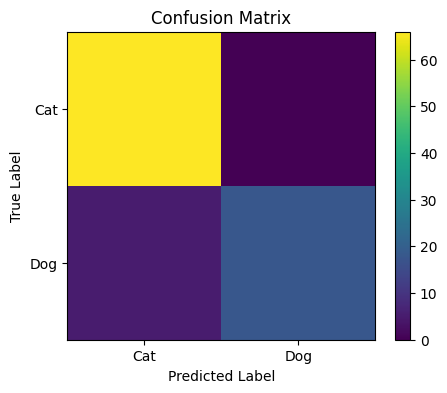

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0,1], ["Cat", "Dog"])
plt.yticks([0,1], ["Cat", "Dog"])
plt.colorbar()
plt.show()

In [39]:
import numpy as np

def add_noise(y, noise_factor=0.005):
    noise = np.random.randn(len(y))
    return y + noise_factor * noise

def change_volume(y, gain=1.2):
    return y * gain

def time_shift(y, shift_max=0.2):
    shift = int(np.random.uniform(-shift_max, shift_max) * len(y))
    return np.roll(y, shift)

In [40]:
def extract_features(y, sr):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)
    return np.hstack((mfcc_mean, mfcc_std))

In [41]:
X = []
y_labels = []

In [42]:
for file in cat_files:
    audio_path = os.path.join(base_path, file)
    
    y_audio, sr = librosa.load(audio_path, sr=16000)
    y_audio = crop_or_pad(y_audio, TARGET_SAMPLES)

    # Original
    X.append(extract_features(y_audio, sr))
    y_labels.append(0)

    # Augmentations
    X.append(extract_features(add_noise(y_audio), sr))
    y_labels.append(0)

    X.append(extract_features(change_volume(y_audio, 0.8), sr))
    y_labels.append(0)

    X.append(extract_features(time_shift(y_audio), sr))
    y_labels.append(0)

In [43]:
for file in dog_files:
    audio_path = os.path.join(base_path, file)
    
    y_audio, sr = librosa.load(audio_path, sr=16000)
    y_audio = crop_or_pad(y_audio, TARGET_SAMPLES)

    # Original
    X.append(extract_features(y_audio, sr))
    y_labels.append(1)

    # Augmentations
    X.append(extract_features(add_noise(y_audio), sr))
    y_labels.append(1)

    X.append(extract_features(change_volume(y_audio, 0.8), sr))
    y_labels.append(1)

    X.append(extract_features(time_shift(y_audio), sr))
    y_labels.append(1)

In [44]:
X = np.array(X)
y_labels = np.array(y_labels)

print("Final feature matrix shape:", X.shape)
print("Final label vector shape:", y_labels.shape)

Final feature matrix shape: (1108, 26)
Final label vector shape: (1108,)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy after augmentation:", accuracy_score(y_test, y_pred))

Accuracy after augmentation: 0.9099099099099099


In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[131   0]
 [ 20  71]]


In [48]:
accuracy_no_aug = accuracy_score(y_test, y_pred)
cm_no_aug = confusion_matrix(y_test, y_pred)

In [50]:
accuracy_aug = accuracy_score(y_test, y_pred)
cm_aug = confusion_matrix(y_test, y_pred)

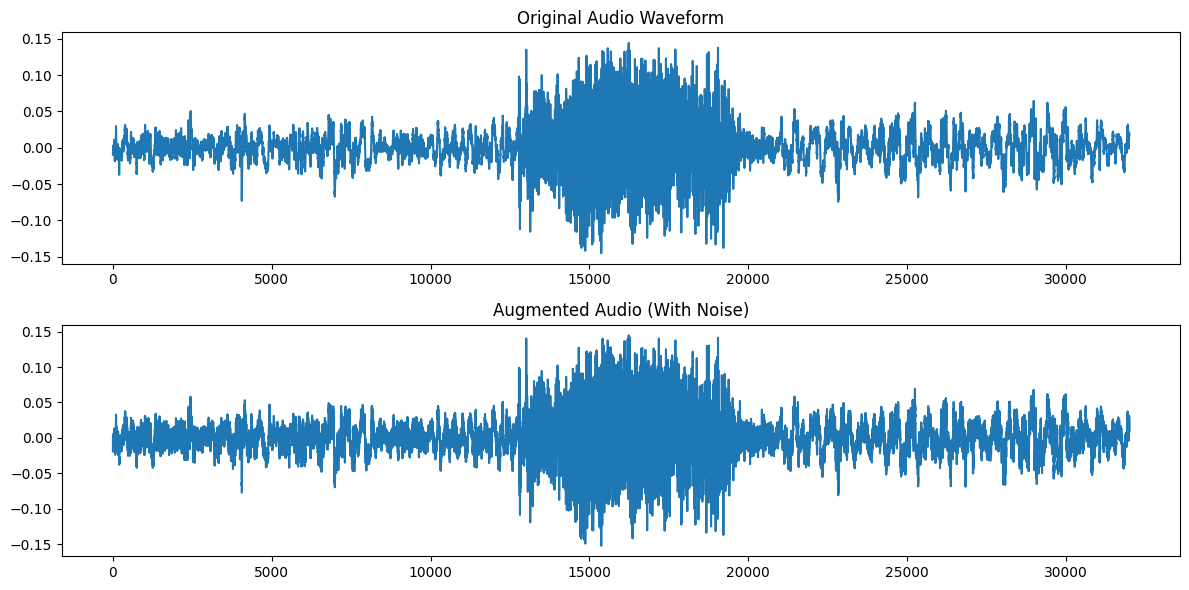

In [51]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(y_fixed)
plt.title("Original Audio Waveform")

plt.subplot(2,1,2)
plt.plot(add_noise(y_fixed))
plt.title("Augmented Audio (With Noise)")

plt.tight_layout()
plt.show()

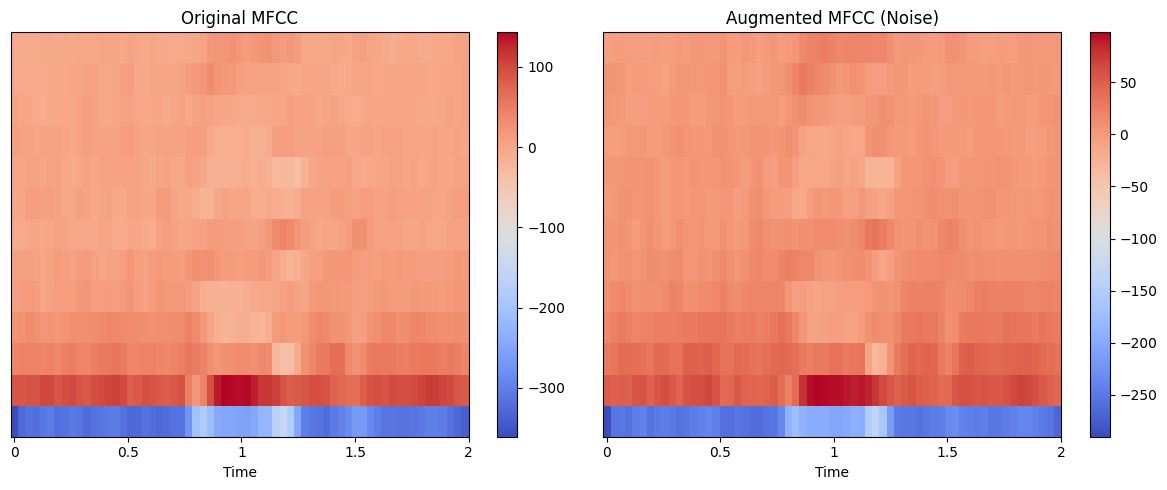

In [52]:
mfcc_orig = librosa.feature.mfcc(y=y_fixed, sr=sr, n_mfcc=13)
mfcc_aug  = librosa.feature.mfcc(y=add_noise(y_fixed), sr=sr, n_mfcc=13)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
librosa.display.specshow(mfcc_orig, sr=sr, x_axis='time')
plt.title("Original MFCC")
plt.colorbar()

plt.subplot(1,2,2)
librosa.display.specshow(mfcc_aug, sr=sr, x_axis='time')
plt.title("Augmented MFCC (Noise)")
plt.colorbar()

plt.tight_layout()
plt.show()

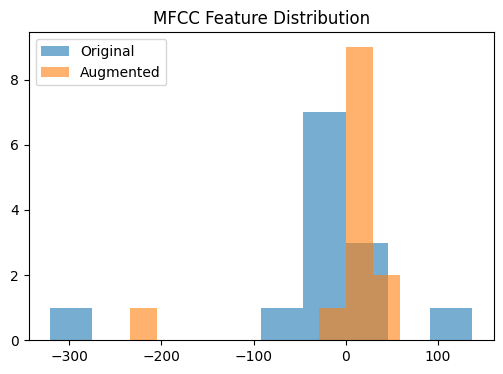

In [53]:
plt.figure(figsize=(6,4))
plt.hist(mfcc_mean, alpha=0.6, label="Original")
plt.hist(np.mean(mfcc_aug, axis=1), alpha=0.6, label="Augmented")
plt.legend()
plt.title("MFCC Feature Distribution")
plt.show()

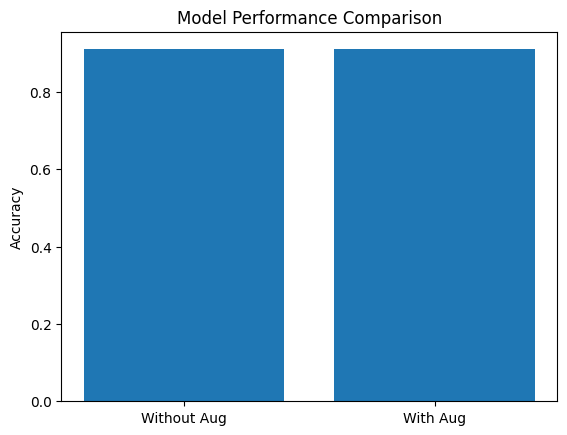

In [54]:
plt.bar(["Without Aug", "With Aug"], [accuracy_no_aug, accuracy_aug])
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()